## Kaggle Competition

### [Store Sales - Time Series Forecasting](https://www.kaggle.com/c/store-sales-time-series-forecasting/data)

#### Noah Wong

Explotary Analysis of data:




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. train.csv and 2. test.csv


In [2]:
train = pd.read_csv("../Data/train.csv", index_col = 0)
test = pd.read_csv("../Data/test.csv", index_col = 0)
train.head(20)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0
5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,2013-01-01,1,CELEBRATION,0.0,0
7,2013-01-01,1,CLEANING,0.0,0
8,2013-01-01,1,DAIRY,0.0,0


In [3]:
print(train["date"].max())
print(train["date"].min())

2017-08-15
2013-01-01


In [4]:
print(test["date"].max())
print(test["date"].min())

2017-08-31
2017-08-16


In [5]:
print(train.shape)
print(test.shape)

(3000888, 5)
(28512, 4)


In [6]:
train["sales"].mean()

357.77574911262707

In [7]:
train["family"].nunique()
groupByFamily = train.groupby("family").median()
print(groupByFamily)

                            store_nbr      sales  onpromotion
family                                                       
AUTOMOTIVE                       27.5     5.0000          0.0
BABY CARE                        27.5     0.0000          0.0
BEAUTY                           27.5     2.0000          0.0
BEVERAGES                        27.5  1784.0000          2.0
BOOKS                            27.5     0.0000          0.0
BREAD/BAKERY                     27.5   401.0000          0.0
CELEBRATION                      27.5     3.0000          0.0
CLEANING                         27.5   938.0000          1.0
DAIRY                            27.5   520.0000          1.0
DELI                             27.5   218.9715          0.0
EGGS                             27.5   131.0000          0.0
FROZEN FOODS                     27.5    83.0000          0.0
GROCERY I                        27.5  3185.0000          5.0
GROCERY II                       27.5    12.0000          0.0
HARDWARE

## 3. Stores.csv

There are 270 stores in 22 cities. Quito has the most stores with 18. 

In [8]:
stores = pd.read_csv("../Data/stores.csv", index_col = 0)
print(stores.shape)
stores.head()

(54, 4)


,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [9]:
stores["city"].nunique()

22

                0
city             
Ambato          2
Babahoyo        1
Cayambe         1
Cuenca          3
Daule           1
El Carmen       1
Esmeraldas      1
Guaranda        1
Guayaquil       8
Ibarra          1
Latacunga       2
Libertad        1
Loja            1
Machala         2
Manta           2
Playas          1
Puyo            1
Quevedo         1
Quito          18
Riobamba        1
Salinas         1
Santo Domingo   3


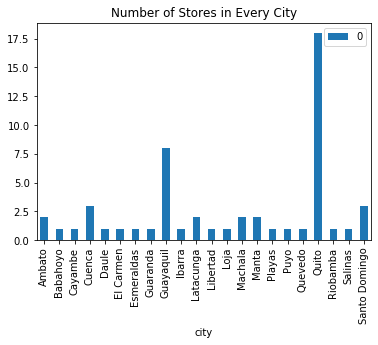

In [10]:
cities = stores.groupby("city").size().to_frame()
numberStoresPlot = cities.plot.bar(title = "Number of Stores in Every City")
print(cities)

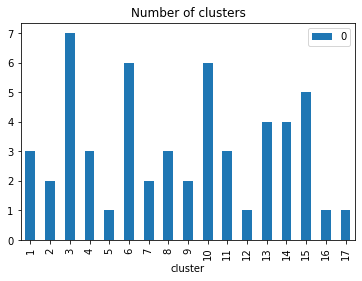

In [11]:
clusters = stores.groupby("cluster").size().to_frame()
numberClusterPlot = clusters.plot.bar(title = "Number of clusters")

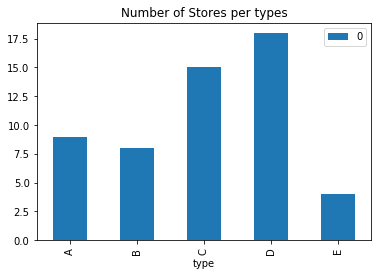

In [12]:
typeStores = stores.groupby("type").size().to_frame()
numberClusterPlot = typeStores.plot.bar(title = "Number of Stores per types")

                                 0
state                             
Azuay                            3
Bolivar                          1
Chimborazo                       1
Cotopaxi                         2
El Oro                           2
Esmeraldas                       1
Guayas                          11
Imbabura                         1
Loja                             1
Los Rios                         2
Manabi                           3
Pastaza                          1
Pichincha                       19
Santa Elena                      1
Santo Domingo de los Tsachilas   3
Tungurahua                       2


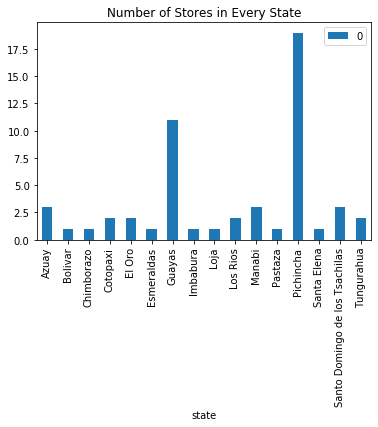

In [13]:
states = stores.groupby("state").size().to_frame()
numberStoresPlot = states.plot.bar(title = "Number of Stores in Every State")
print(states)

## 4. Oil

In [14]:
oil = pd.read_csv("../Data/oil.csv", index_col = 0, names = ["date", "price"])
oil = oil.drop(['date'])
print(oil.shape)
print(oil.columns)
oil.head()

(1218, 1)
Index(['price'], dtype='object')


,price
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.2


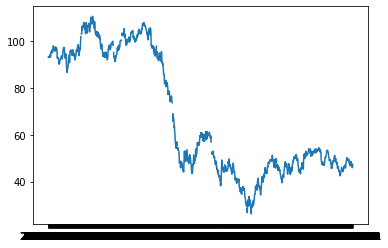

In [15]:
plt.plot(oil,)
plt.show()

## 5. Holidays

In [16]:
holidays = pd.read_csv("../Data/holidays_events.csv")
print(holidays.size)
holidays.head()

2100


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


              0
type           
Additional   51
Bridge        5
Event        56
Holiday     221
Transfer     12
Work Day      5
National    174
Local       152
Regional     24
Name: locale, dtype: int64


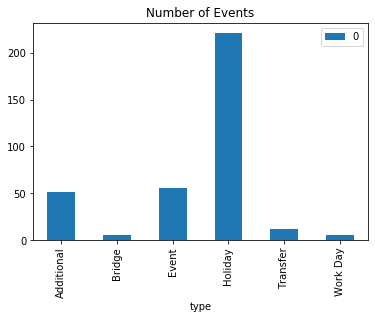

In [17]:
typeEvent = holidays.groupby("type").size().to_frame()
numberStoresPlot = typeEvent.plot.bar(title = "Number of Events")
print(typeEvent)
print(holidays["locale"].value_counts())

In [22]:
holidaysOnly= holidays[holidays["type"] == "Holiday"]
holidaysOnly.shape
holidaysOnly["locale"].value_counts()


Local       137
National     60
Regional     24
Name: locale, dtype: int64